### Importar as imagens

In [3]:
url = "https://www.kaggle.com/api/v1/datasets/download/sameeharahman/preprocessed-snake-images?datasetVersionNumber=1"

In [4]:
import requests
response = requests.get(url)

if response.status_code == 200:
    with open('preprocessed-snake-images.zip', 'wb') as f:
        f.write(response.content)
    print("Download completo!")
else:
    print("Falha no download. Status code:", response.status_code)

Download completo!


In [28]:
# Extrair a pasta do dataset, funciona apenas 
# !unzip -q preprocessed-snake-images.zip

### Preparação de Dados com ImageDataGenerator


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os

In [16]:
# Editar conforme o local da pasta
train_path = './preprocessed-cleaned-set/train'

In [17]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [18]:
batch_size = 16
target_size = (224, 224)

In [19]:
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 13913 images belonging to 5 classes.


In [20]:
validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3476 images belonging to 5 classes.


### Construção e Treinamento do Modelo CNN

In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [22]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [23]:
for layer in base_model.layers:
    layer.trainable = False

In [24]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

In [25]:
model = Model(inputs=base_model.input, outputs=predictions)

In [26]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10


C:\Users\MICRO\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


869/869 ━━━━━━━━━━━━━━━━━━━━ 274s 308ms/step - accuracy: 0.5840 - loss: 1.0544 - val_accuracy: 0.7512 - val_loss: 0.6746
Epoch 2/10
  1/869 ━━━━━━━━━━━━━━━━━━━━ 2:21 163ms/step - accuracy: 0.9375 - loss: 0.5160

d:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - accuracy: 0.9375 - loss: 0.5160 - val_accuracy: 0.5000 - val_loss: 1.3265
Epoch 3/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 181s 209ms/step - accuracy: 0.7430 - loss: 0.6794 - val_accuracy: 0.7601 - val_loss: 0.6405
Epoch 4/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 0s 145us/step - accuracy: 0.8750 - loss: 0.4312 - val_accuracy: 0.7500 - val_loss: 0.3188
Epoch 5/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 182s 209ms/step - accuracy: 0.7811 - loss: 0.5915 - val_accuracy: 0.7667 - val_loss: 0.6160
Epoch 6/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step - accuracy: 0.8750 - loss: 0.5123 - val_accuracy: 0.5000 - val_loss: 1.5012
Epoch 7/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 181s 208ms/step - accuracy: 0.8028 - loss: 0.5319 - val_accuracy: 0.7768 - val_loss: 0.5955
Epoch 8/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 0s 155us/step - accuracy: 0.9375 - loss: 0.3097 - val_accuracy: 1.0000 - val_loss: 0.1161
Epoch 9/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 175s 202ms/step - accuracy: 0.8162 - loss: 0.4907 - val

In [29]:
# Editar conforme o local da pasta
model.save('./content/snake_classifier_mobilenetv2.h5')

### Teste de Classificação com uma Nova Imagem

In [30]:
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [31]:
class_names = {
    0: 'Nerodia sipedon - Class 1',
    1: 'Thamnophis sirtalis - Class 2',
    2: 'Storeria dekayi - Class 3',
    3: 'Pantherophis obsoletus - Class 4',
    4: 'Crotalus atrox - Class 5'
}

In [33]:
# Editar conforme o local da pasta
model = load_model('./content/snake_classifier_mobilenetv2.h5')

In [51]:
def classify_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = img.astype("float") / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)
    return class_names[predicted_class[0]]

In [55]:
# Editar
new_image_path = './content/tests/animal_class5.jpg'

4.9.0


In [56]:
predicted_class_name = classify_image(new_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Text(0.5, 1.0, 'Crotalus atrox - Class 5')

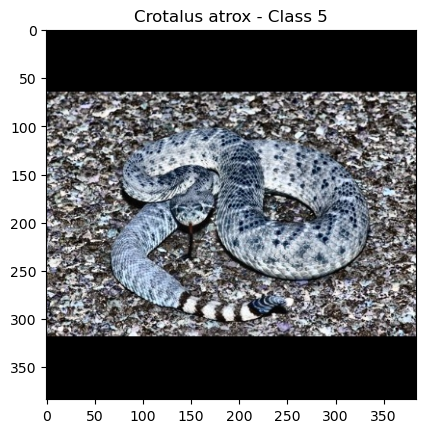

In [57]:
imagem = cv2.imread(new_image_path)
plt.imshow(imagem)
plt.title(predicted_class_name)